# Granulometric analysis of sand using classic models
### By Rafael Brusiquesi Martins

# Particle Systems

The study of particle systems behaviour depends highly on how the sizes of the particles are distributed in the sample, so it become useful to extract and predict information about these concepts.
In this notebook, we are going to model and fit well stablished correlations into experimental data and compare the results.

# Importing libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn')

import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
from scipy.misc import derivative
from sklearn.metrics import r2_score

# Curve Fitting

To fit the proposed models into the data, it becomes necessary the use of linear or non-linear regression, so we'll define a new class to handle general purpose one-dimentional regression.

In [2]:
class Regression:
    '''
    function: function(x, *args)
    x: np.array(data_x)
    y: np.array(data_y)
    '''

    @staticmethod
    def fit(function, x, y):
        parameters = curve_fit(function, x, y)[0]
        return parameters

    @staticmethod
    def linear_fit(x, y):
        parameters = Regression.fit(Regression.linear_function, x, y)
        return parameters

    @staticmethod
    def linear_function(x, a, b):
        return a * x + b

# R2 calculation function

In [3]:
def calc_r2(data_x, data_y, model_function):
    predictions = model_function(data_x)
    r2 = r2_score(y_true=data_y, y_pred=predictions)
    return r2

# Plotting function

In [4]:
def plot_function_and_data(function, xs, ys, title='', x_label='x', y_label='y', granularity=100):
    function_x = np.linspace(start=xs[0], stop=xs[-1], num=granularity)
    function_y = np.array([function(x) for x in function_x])

    plt.title(title, fontsize=16)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.scatter(xs, ys, c='k', s=15, alpha=0.8)
    plt.plot(function_x, function_y, alpha=0.5)
    plt.show()

In [5]:
def plot_only_function(function, xs, title='', x_label='x', y_label='y', granularity=100):
    function_x = np.linspace(start=xs[0], stop=xs[-1], num=granularity)
    function_y = np.array([function(x) for x in function_x])

    plt.title(title, fontsize=16)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.plot(function_x, function_y, alpha=0.5)
    plt.show()

# Cummulative and Frequency Distributions

The Cummulative Distribution is defined as the graphical form for X as a function of D. This distribution will be estimated by the models that will be discussed further.

The Frequency Distribution is obtained by the derivative of the Cummulative Distribution, in this way, arise the need of defining a function for numerical differentiation.

In [6]:
def plot_distributions(model):
    frequency_distribution = lambda D: derivative(model.predict, D, 1e-6)

    plot = plot_function_and_data(model.predict, Ds, Xs, title='Cummulative Distribution', x_label='D# (mm)', y_label='X')
    plot = plot_only_function(frequency_distribution, [0.01, Ds[-1]], title='Frequency Distribution', x_label='D# (mm)', y_label='dX/dD')

# Loading the data

The data used in this notebook was obtained by a sieving process of a sample of sand. We'll be using the Pandas library to load and Numpy to work with the data.

In [7]:
sieving_data = {'Tyler System (mesh)': {0: '+8', 1: '-8+10', 2: '-10+14', 3: '-14+20', 4: '-20+28', 5: '-28+35', 6: '-35+48', 7: '-48+65', 8: '-65+100', 9: '-100+150', 10: '-150+200', 11: '-200'}, 'Retained Mass': {0: 12.6, 1: 38.7, 2: 50.0, 3: 63.7, 4: 32.5, 5: 17.4, 6: 11.2, 7: 7.8, 8: 3.7, 9: 2.6, 10: 1.8, 11: 1.1}, 'Retained Mass Fraction (Δx)': {0: 0.05183052241875771, 1: 0.15919374742904155, 2: 0.20567667626491157, 3: 0.2620320855614973, 4: 0.13368983957219252, 5: 0.07157548334018922, 6: 0.04607157548334019, 7: 0.03208556149732621, 8: 0.015220074043603456, 9: 0.010695187165775402, 10: 0.007404360345536817, 11: 0.004524886877828055}, 'Sieve Gap d# (mm)': {0: 2.38, 1: 1.68, 2: 1.19, 3: 0.841, 4: 0.595, 5: 0.42, 6: 0.297, 7: 0.21, 8: 0.149, 9: 0.105, 10: 0.074, 11: 0.0}, 'X': {0: 0.9481694775812423, 1: 0.7889757301522007, 2: 0.5832990538872892, 3: 0.3212669683257918, 4: 0.18757712875359933, 5: 0.11600164541341007, 6: 0.0699300699300699, 7: 0.03784450843274367, 8: 0.02262443438914019, 9: 0.011929247223364747, 10: 0.004524886877827927, 11: 0.0}}
sieving_dataframe = pd.DataFrame(sieving_data)
sieving_dataframe = sieving_dataframe[:-1]

Ds = sieving_dataframe['Sieve Gap d# (mm)'].values
Xs = sieving_dataframe['X'].values

Ds = np.flip(Ds)
Xs = np.flip(Xs)

sieving_dataframe

,Tyler System (mesh),Retained Mass,Retained Mass Fraction (Δx),Sieve Gap d# (mm),X
0,+8,12.6,0.051831,2.380,0.948169
1,-8+10,38.7,0.159194,1.680,0.788976
2,-10+14,50.0,0.205677,1.190,0.583299
3,-14+20,63.7,0.262032,0.841,0.321267
4,-20+28,32.5,0.133690,0.595,0.187577
5,-28+35,17.4,0.071575,0.420,0.116002
6,-35+48,11.2,0.046072,0.297,0.069930
7,-48+65,7.8,0.032086,0.210,0.037845
8,-65+100,3.7,0.015220,0.149,0.022624
9,-100+150,2.6,0.010695,0.105,0.011929


# Comparing the models

In this section, we will define the functions to 3 models for granulometric analysis, which are GGS, RRB and Sigmoid. And plot it's distributions.

### GGS

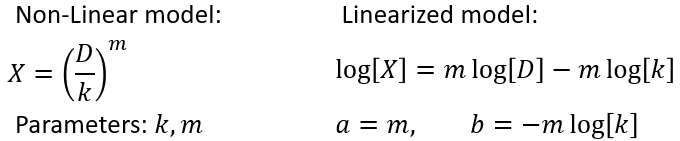

In [8]:
class GGS:
    def __init__(self):
        self.k = None
        self.m = None
    
    @staticmethod
    def model_function(D, k, m):
        X = (D/k)**m
        return X

    def predict(self, D):
        return self.model_function(D, self.k, self.m)
    
    def non_linear_fit(self, data_x, data_y):
        self.k, self.m = Regression.fit(self.model_function, data_x, data_y)
        return self.k, self.m
    
    def linear_fit(self, data_x, data_y):
        log_D = np.log10(data_x)
        log_X = np.log10(data_y)

        a, b = Regression.linear_fit(log_D, log_X)
        print('Linear R2:', calc_r2(log_D, log_X, lambda D: Regression.linear_function(D, a, b)))
        self.m = a
        self.k = 10**(-b/self.m)
        return self.k, self.m

#### Linear

Linear R2: 0.9848683692648238


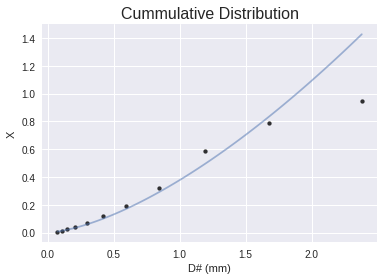

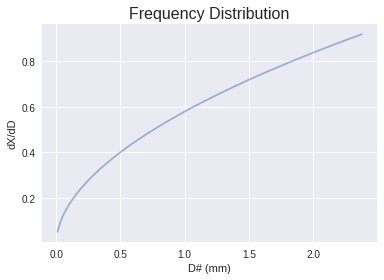

k: 1.887369058106265 m: 1.5337818930473894
R2: 0.7901479685797068


In [9]:
ggs = GGS()

k, m = ggs.linear_fit(Ds, Xs)
plot_distributions(ggs)

print('k:', k, 'm:', m)

r2 = calc_r2(data_x=Ds, data_y=Xs, model_function=ggs.predict)
print('R2:', r2)

#### Non-Linear

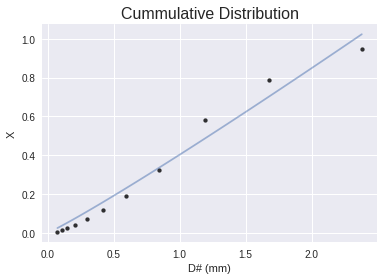

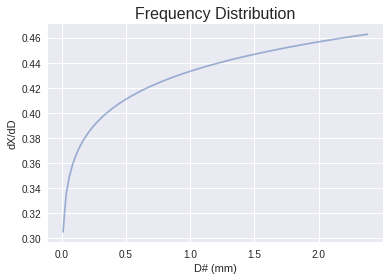

k: 2.3294913635066075 m: 1.0760142251182445
R2: 0.973037488207075


In [10]:
k, m = ggs.non_linear_fit(Ds, Xs)
plot_distributions(ggs)

print('k:', k, 'm:', m)

r2 = calc_r2(data_x=Ds, data_y=Xs, model_function=ggs.predict)
print('R2:', r2)

### RRB

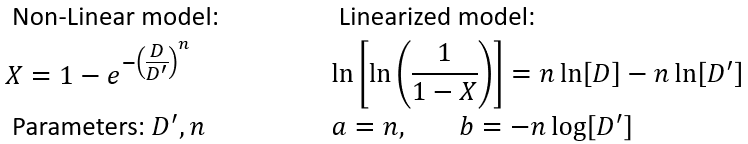

In [11]:
class RRB:
    def __init__(self):
        self.D_prime = None
        self.n = None
    
    @staticmethod
    def model_function(D, D_prime, n):
        X = 1 - np.exp(-(D/D_prime)**n)
        return X

    def predict(self, D):
        return self.model_function(D, self.D_prime, self.n)
    
    def non_linear_fit(self, data_x, data_y):
        self.D_prime, self.n = Regression.fit(self.model_function, data_x, data_y)
        return self.D_prime, self.n
    
    def linear_fit(self, data_x, data_y):
        log_D = np.log(data_x)
        log_X = np.log(np.log(1/(1-data_y)))

        a, b = Regression.linear_fit(log_D, log_X)

        print('Linear R2:', calc_r2(log_D, log_X, lambda D: Regression.linear_function(D, a, b)))

        self.n = a
        self.D_prime = np.exp(-b/self.n)
        return self.D_prime, self.n

#### Linear

Linear R2: 0.9969069634674488


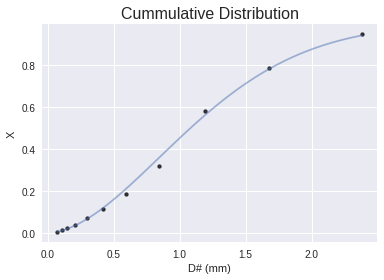

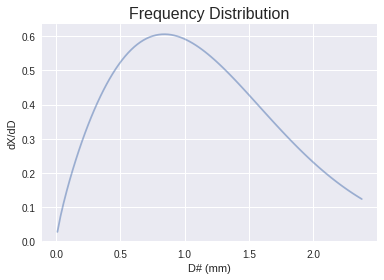

D_prime: 1.3265416452557526 n: 1.7947874014356908
R2: 0.9978850996074299


In [12]:
rrb = RRB()

D_prime, n = rrb.linear_fit(Ds, Xs)
plot_distributions(rrb)

print('D_prime:', D_prime, 'n:', n)

r2 = calc_r2(data_x=Ds, data_y=Xs, model_function=rrb.predict)
print('R2:', r2)

#### Non-Linear

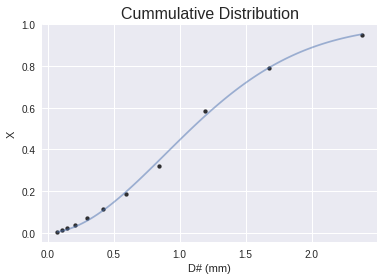

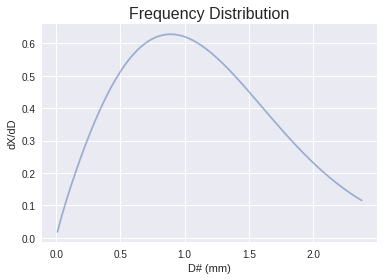

D_prime: 1.3215923542876629 n: 1.8976606865331935
R2: 0.9985524362123019


In [13]:
D_prime, n = rrb.non_linear_fit(Ds, Xs)
plot_distributions(rrb)

print('D_prime:', D_prime, 'n:', n)

r2 = calc_r2(data_x=Ds, data_y=Xs, model_function=rrb.predict)
print('R2:', r2)

## Sigmoid

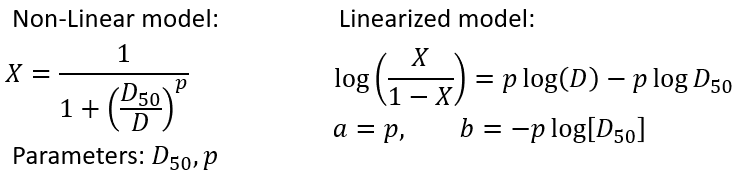

In [14]:
class Sigmoid:
    def __init__(self):
        self.D_50 = None
        self.p = None
    
    @staticmethod
    def model_function(D, D_50, p):
        X = 1 / (1 + (D_50/D)**p)
        return X

    def predict(self, D):
        return self.model_function(D, self.D_50, self.p)
    
    def non_linear_fit(self, data_x, data_y):
        self.D_50, self.p = Regression.fit(self.model_function, data_x, data_y)
        return self.D_50, self.p
    
    def linear_fit(self, data_x, data_y):
        log_D = np.log10(data_x)
        log_X = np.log10(data_y/(1-data_y))

        a, b = Regression.linear_fit(log_D, log_X)
        print('Linear R2:', calc_r2(log_D, log_X, lambda D: Regression.linear_function(D, a, b)))
        
        self.p = a
        self.D_50 = 10**(-b/self.p)
        return self.D_50, self.p

#### Linear

Linear R2: 0.9753325841764574


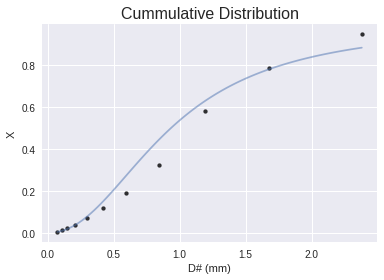

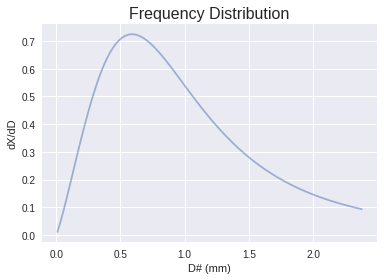

D_50: 0.9341527841153823 p: 2.1717660426934895
R2: 0.9742984124487664


In [15]:
sigmoid = Sigmoid()

D_50, p = sigmoid.linear_fit(Ds, Xs)
plot_distributions(sigmoid)

print('D_50:', D_50, 'p:', p)

r2 = calc_r2(data_x=Ds, data_y=Xs, model_function=sigmoid.predict)
print('R2:', r2)

#### Non-Linear

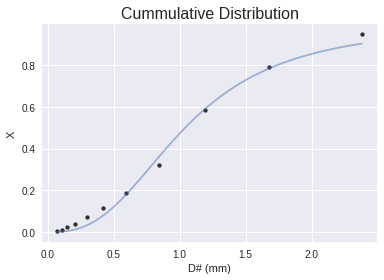

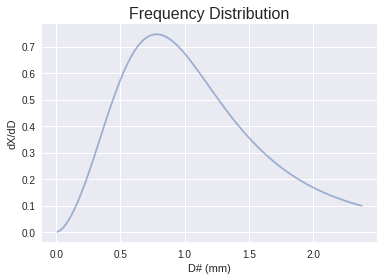

D_50: 0.9341527841153823 p: 2.7048596681306023
R2: 0.9936017563978705


In [16]:
sigmoid = Sigmoid()

d_50, p = sigmoid.non_linear_fit(Ds, Xs)
plot_distributions(sigmoid)

print('D_50:', D_50, 'p:', p)

r2 = calc_r2(data_x=Ds, data_y=Xs, model_function=sigmoid.predict)
print('R2:', r2)